#### Libraries Import:

glob       > For Files name reading from directory.

pandas     > For Datamanipulation and analysis.

cv2        > called opencv, Image processing and Computer vision tasks.

numpy      > Mathametics and Multi-dimensional arrays and matrices handling.

matplotlib > plotting library showing graphs and images

skimage    > Image processing and computer vision library.

sklearn    > DataScience, Machine Learning techniques library.

In [1]:
import glob
import pandas as pd  # as means that we use pandas library short form  as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt # matplotlib is big library, we are just calling pyplot function 
from skimage.feature import hog #We are calling only hog  
from sklearn.externals import joblib # Calling the joblib function from sklearn, use for model saving 
                                     # and loading.

#### Libraries version:

Below are the current version of libraries the program is tested on

In [2]:
# to get the version information we need to call for full library
import matplotlib
import skimage 
import sklearn

In [3]:
print ('Pandas Version: ',pd.__version__)
print ('OpenCv Version: ',cv2.__version__)
print ('Numpy Version: ',np.__version__)
print ('Matplotlib Version: ',matplotlib.__version__)
print ('skimage Version: ',skimage.__version__)
print ('sklearn Version: ',sklearn.__version__)

Pandas Version:  0.24.2
OpenCv Version:  3.3.1
Numpy Version:  1.16.3
Matplotlib Version:  3.0.3
skimage Version:  0.15.0
sklearn Version:  0.20.3


In [4]:
# Loading the mode into same name
pca = joblib.load('pca.pkl')
classifier = joblib.load('svm.pkl')

## Detection and classification


In this work our Goal is to find and classify the Traffic sign. For finding the traffic sign we choose Color based Detection techniques. As in the below picture it can be easily observed that the majority of traffic signs are fall in 4 colors Blue, Red, white and Maroon.
![Sign Boards](Results/Sign_Boards.png)

We choose colors ranges in HSV color space to extract these ranges.[http://colorizer.org/](http://colorizer.org/).

These ranges color Threshold Defined Below, after selecting these colors ranges we delete all other colors in the image and our image become binary.

After that we applied Morphological Transformations on the image. Morphological transformations are some simple operations based on the image shape. It is normally performed on binary images. It needs two inputs, one is our original image, second one is called structuring element or kernel which decides the nature of operation. Two basic morphological operators are Erosion and Dilation. Then its variant forms like Opening, Closing, Gradient etc also comes into play.[[https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html]](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html) In our case first we apply opening and then dilation. We will see them from left towards right at each step with help of following image: 

![Morphological Transformations](Results/Moropholgy_explaination.png)


Benefit of Morphology is that we can remove noice points and make our object contours or blob quit big. After the Morphology operation we applied the contours. Contours(blob) can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition. After the dilation, we have a image like this where most part is black or some or white. 

![threshold_image_contours_input](Results/threshold_image_contours_input.png)

There are numbers of region small and big that are connected by color. The biggest region in our image that is connected by color shown below:

![Bigger Contours](Results/major_contours.png)

After this we found contours coordinates and then crop the orignal image perspective to that coordinates. that is shown below:

![Crop_Image](Results/croped_image.png)

After that we resized this image to (64,64). then find the HOG whose output shown below:

![HOG Output_Image](Results/hog_output.png)

After that we forward it to Pca, which reduce the dimensions of it. then we forward it to SVM which predict that which class the this image belong, and show the image on the orignal image.

![Final Output_Image](Results/Final_Output.png)

The overall process can be understandable by this flow graph.
![Flow Graph](Results/Flow_Graph.JPG)

Command Explaination: 

1. cv2.cvtColor() > Changing the color type like(hsv,bgr,rgb). In default opencv read bgr color for visulizing the right color we need to convert it RGB channel colors.

2. Color_Sign_min = np.array([h_min, s_min, v_min],np.uint8) These colors values are obtained by highly observing the color hit and trial and using some websites help like http://colorizer.org/. They are represent in hsv color channel.

3. Color_Sign_max = np.array([h_max, s_max, v_max],np.uint8) These colors values are obtained by highly observing the color hit and trial and using some websites help like http://colorizer.org/

4. kernel = np.ones((3,3),np.uint8) Kernal Required for Morphology operations. this kernal is 3*3 matrix of ones.
                       [1, 1, 1]
                       [1, 1, 1]
                       [1, 1, 1]

5. cv2.inRange(image_pixel_values,min,max) its only remain those values those of image pixel colors which are in the range min and max. its output binary image white and black.

6. cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernal) Morophology opening operation with using kernal.

7. cv2.dilate(binary_image,kernel,iterations = 1) Morophology Dilation operation with iteration 1. means kernel only move one time on the image.

8. cv2.findContours() Finding the connected component regions.

9. cv2.resize(input_image, (new width,new hight)) > For resizing the image to new dimension, in this case we choose

10. hog(crop_image, orientations=8) > Apply hog features on crop image. in 8 different orientations gradients. in our case it returns the 2592 size array.

### Testing on One Image:

In [310]:
image_path='dataset/input/image.035235.jpg' # Tested image path

Predicted Class:  1


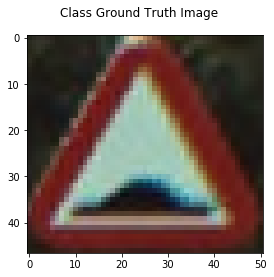

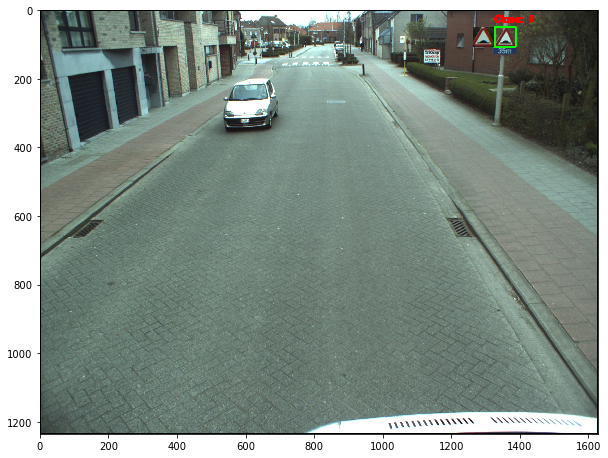

In [318]:
img = cv2.imread(image_path) # reading the image
dst = img #cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21) # we are not applying any lose function beause it make it quit slow

hsv_img = cv2.cvtColor(dst,cv2.COLOR_BGR2HSV) # converting color to hsv channel

blue_Sign_min = np.array([100, 50, 90],np.uint8) #Blue color minimum threshold
blue_Sign_max = np.array([110, 255, 226],np.uint8)#Blue color Maximum threshold

red_Sign_min = np.array([0, 76, 80],np.uint8)#Red color minimum threshold
red_Sign_max = np.array([11, 255, 150],np.uint8)#Red color Maximum threshold



maroon_Sign_min = np.array([155, 80, 60],np.uint8)#maroon color minimum threshold
maroon_Sign_max = np.array([180, 189, 150],np.uint8)#maroon color Maximum threshold


kernel = np.ones((3,3),np.uint8) # kernal matrix 3 cross 3 of ones

frame_threshed_blue = cv2.inRange(hsv_img, blue_Sign_min, blue_Sign_max) # finding blue color
#applying Moropholgy operation on Blue
thresh_blue = cv2.morphologyEx(frame_threshed_blue, cv2.MORPH_OPEN, kernel) 
dilation_blue = cv2.dilate(thresh_blue,kernel,iterations = 1)

frame_threshed_red = cv2.inRange(hsv_img, red_Sign_min, red_Sign_max)# finding red color
#applying Moropholgy operation on red
thresh_red = cv2.morphologyEx(frame_threshed_red, cv2.MORPH_OPEN, kernel)
dilation_red = cv2.dilate(thresh_red,kernel,iterations = 1)


frame_threshed_maroon = cv2.inRange(hsv_img, maroon_Sign_min, maroon_Sign_max)# finding maroon color
#applying Moropholgy operation on Maroon
thresh_maroon = cv2.morphologyEx(frame_threshed_maroon, cv2.MORPH_OPEN, kernel)
dilation_maroon = cv2.dilate(thresh_maroon,kernel,iterations = 1)
#adding three colors of dialation.
image_dilation=np.add(dilation_red,dilation_blue,dilation_maroon)
#Finding contours on 3 colors find image.
(_,cnts, _) = cv2.findContours(image_dilation.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#finding contours of conected component

for c in cnts:
    #pASS only if contour area is greater than 1000
    if cv2.contourArea(c)>1000:
        (x0, y0, w0, h0) = cv2.boundingRect(c)# Finding the boundry rectangle of contours
        # only pass if hight and width are not greater than 2.5times from other.
        if (((h0/w0)<2.51) and ((h0/w0)>0.39)):
            
            White_Sign_min = np.array([80,35,170],np.uint8)#white color minimum threshold
            White_Sign_max = np.array([95,90,255],np.uint8)#white color maximum threshold


            kernel = np.ones((3,3),np.uint8)
            #taking that part of image where contours are, we are thresholding 30 pixcel from its boundry so that we can cover full object
            frame_threshed_white = cv2.inRange(hsv_img[y0-30:y0+h0+30,x0-30:x0+w0+30], White_Sign_min, White_Sign_max)# finding white color
            # If there is a white area then do this
            if frame_threshed_white is not None:
                #applying Moropholgy operation on White
                thresh_white = cv2.morphologyEx(frame_threshed_white, cv2.MORPH_OPEN, kernel)
                dilation_white = cv2.dilate(thresh_white,kernel,iterations = 1)

                major_dilation=np.add(image_dilation[y0-30:y0+h0+30,x0-30:x0+w0+30],dilation_white)
            #If there is no white area then do this.
            else:
                major_dilation=image_dilation[y0-30:y0+h0+30,x0-30:x0+w0+30]
            
            #Finding contours on 4 color sum.
            (_,cnts2, _) = cv2.findContours(major_dilation.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#finding contours of conected component
            
            for d in cnts2:
                # IF contours area bigger than 1500.
                if cv2.contourArea(d)>1500:
                    #getting the boundry of rectangle around the contours.
                    (x, y, w, h) = cv2.boundingRect(d)
                    if (((h/w)<2.51) and ((h/w)>0.39)):
            
                        #Croping and resizing the image to transfer it to Hog feature
                        image_resize=cv2.resize(img[y0-30:y0+h0+30,x0-30:x0+w0+30][y:y+h,x:x+w], (64, 64))
                        descriptor,imagehog = hog(image_resize, orientations=8,visualize=True)
                        descriptor_pca=pca.transform(descriptor.reshape(1,-1))#Applying PCA on it
                        Predicted_Class=classifier.predict(descriptor_pca)[0]# predicting the class of sign
                        print ('Predicted Class: ',Predicted_Class)
                        cv2.rectangle(img, (x0, y0), (x0 + w0, y0 + h0), (0, 255, 0), 4)#drawing a green rectange around it.
                        #Putting text on the upward of bounding box
                        cv2.putText(img, 'Class: '+str(Predicted_Class), (x0, y0 - 15),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 6)
                        #loading the ground truth class respective to the predicted class
                        ground_truth_image=cv2.imread('classes_images/'+str(Predicted_Class)+'.png')
                        # displaying the ground truth image
                        fig = plt.figure()
                        plt.imshow(cv2.cvtColor(ground_truth_image,cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
                        fig.suptitle('Class Ground Truth Image')
                        plt.show()
                        #ground truth image resize and match according to the sign detected
                        ground_truth_image_resized=cv2.resize(ground_truth_image, (w,h))
                        #replaceing the sign image adjacent to detected sign
                        img[y0:y0+ground_truth_image_resized.shape[0], x0-w:x0-w+ground_truth_image_resized.shape[1]] = ground_truth_image_resized
                        plt.figure(figsize=[10,10])
                        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
                        cv2.imwrite('Final_Ouput.png',img)

### Visualize the Color thresholding and Morphology Operation:

Lets visualize those images that are generated by previous function to see that what step of image what happened to image.
We are visulizing four images:
1. Orignal Image
2. Threshold Image(When Red color range Detected)
3. Morphology(Opening) Operation
4. Morphology(Dilation) Operation

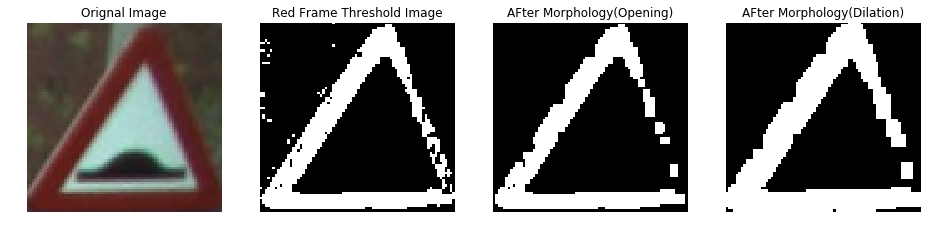

In [168]:
img = cv2.imread(image_path)
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(16, 10), sharex=True, sharey=True)

#ploting crop image
ax1.axis('off')
ax1.imshow(cv2.cvtColor(img[y0-30:y0+h0+30,x0-30:x0+w0+30][y:y+h,x:x+w],cv2.COLOR_BGR2RGB), cmap=plt.cm.gray)
ax1.set_title('Orignal Image')


#ploting Hog image
ax2.axis('off')
ax2.imshow(frame_threshed_red[y0-30:y0+h0+30,x0-30:x0+w0+30][y:y+h,x:x+w], cmap=plt.cm.gray)
ax2.set_title('Red Frame Threshold Image')


#ploting Orignal image
ax3.axis('off')
ax3.imshow(thresh_red[y0-30:y0+h0+30,x0-30:x0+w0+30][y:y+h,x:x+w], cmap=plt.cm.gray)
ax3.set_title('AFter Morphology(Opening)')


#ploting Orignal image
ax4.axis('off')
ax4.imshow(dilation_red[y0-30:y0+h0+30,x0-30:x0+w0+30][y:y+h,x:x+w], cmap=plt.cm.gray)
ax4.set_title('AFter Morphology(Dilation)')
plt.show()


### Testing on Folder of Images and save it as video:

This code processing method is the same as for one image, we have seen upword. the only difference here is saving the output on the video.

In [5]:
Folder_path='dataset/input'

In [6]:
images_paths=glob.glob(Folder_path+'/*.jpg')# Reading all the images path 
img1 = cv2.imread(images_paths[0])# reading the first image to check the size shape of image so that we make a video same of image size
height , width , layers =  img1.shape
#video intialization with 30 frame persec, hight and width is equal to first image hight and width
video = cv2.VideoWriter('video.mp4',cv2.VideoWriter_fourcc(*'DIVX'),30,(width,height))

for i in range(len(images_paths)):
    img = cv2.imread(images_paths[i])# reading the ith image
    
    dst = img#cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21) # we are not applying any lose function beause it make it quit slow

    hsv_img = cv2.cvtColor(dst,cv2.COLOR_BGR2HSV)# converting color to hsv channel
    
    blue_Sign_min = np.array([100, 50, 90],np.uint8)#Blue color minimum threshold
    blue_Sign_max = np.array([110, 255, 226],np.uint8)#Blue color Maximum threshold
    red_Sign_min = np.array([0, 76, 80],np.uint8)#Red color minimum threshold
    red_Sign_max = np.array([11, 255, 150],np.uint8)#Red color Maximum threshold
    maroon_Sign_min = np.array([155, 80, 60],np.uint8)#maroon color minimum threshold
    maroon_Sign_max = np.array([180, 189, 150],np.uint8)#maroon color Maximum threshold
    kernel = np.ones((3,3),np.uint8)# kernal matrix 3 cross 3 of ones
    
    
    frame_threshed_blue = cv2.inRange(hsv_img, blue_Sign_min, blue_Sign_max)# finding blue color
    #applying Moropholgy operation on Blue
    thresh_blue = cv2.morphologyEx(frame_threshed_blue, cv2.MORPH_OPEN, kernel)
    dilation_blue = cv2.dilate(thresh_blue,kernel,iterations = 1)

    frame_threshed_red = cv2.inRange(hsv_img, red_Sign_min, red_Sign_max)# finding red color
    #applying Moropholgy operation on red
    thresh_red = cv2.morphologyEx(frame_threshed_red, cv2.MORPH_OPEN, kernel)
    dilation_red = cv2.dilate(thresh_red,kernel,iterations = 1)

    frame_threshed_maroon = cv2.inRange(hsv_img, maroon_Sign_min, maroon_Sign_max)# finding maroon color
    #applying Moropholgy operation on Maroon
    thresh_maroon = cv2.morphologyEx(frame_threshed_maroon, cv2.MORPH_OPEN, kernel)
    dilation_maroon = cv2.dilate(thresh_maroon,kernel,iterations = 1)
    #adding three colors of dialation.
    image_dilation=np.add(dilation_red,dilation_blue,dilation_maroon)
    #Finding contours on 3 colors based image.
    (_,cnts, _) = cv2.findContours(image_dilation.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#finding contours of conected component
    
    
    for c in cnts:
        #pASS only if contour area is greater than 1000
        if cv2.contourArea(c)>1000:
            if cv2.contourArea(c)<20000:
                (x0, y0, w0, h0) = cv2.boundingRect(c)# Finding the boundry rectangle of contours
                # only pass if hight and width are not greater than 2.5times from other.
                if (((h0/w0)<2.51) and ((h0/w0)>0.39)):

                    White_Sign_min = np.array([80,35,170],np.uint8)#white color minimum threshold
                    White_Sign_max = np.array([95,90,255],np.uint8)#white color maximum threshold
                    #taking that part of image where contours are, we are thresholding 30 pixcel from its boundry so that we can cover full object
                    frame_threshed_white = cv2.inRange(hsv_img[y0-30:y0+h0+30,x0-30:x0+w0+30], White_Sign_min, White_Sign_max)
                    # If there is a white area then do this
                    if frame_threshed_white is not None:
                        #applying Moropholgy operation on White
                        thresh_white = cv2.morphologyEx(frame_threshed_white, cv2.MORPH_OPEN, kernel)
                        dilation_white = cv2.dilate(thresh_white,kernel,iterations = 1)

                        major_dilation=np.add(image_dilation[y0-30:y0+h0+30,x0-30:x0+w0+30],dilation_white)
                    #If there is no white area then do this.
                    else:
                        major_dilation=image_dilation[y0-30:y0+h0+30,x0-30:x0+w0+30]
                    #Finding contours on 4 color sum.
                    (_,cnts2, _) = cv2.findContours(major_dilation.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)#finding contours of conected component

                    
                    for d in cnts2:
                        # IF contours area bigger than 1500.
                        if cv2.contourArea(d)>1500:
                            #getting the boundry of rectangle around the contours.
                            (x, y, w, h) = cv2.boundingRect(d)
                            if (((h/w)<2.51) and ((h/w)>0.39)):
                                #Croping and resizing the image to transfer it to Hog feature
                                image_resize=cv2.resize(img[y0-30:y0+h0+30,x0-30:x0+w0+30][y:y+h,x:x+w], (64, 64))
                                descriptor,imagehog = hog(image_resize, orientations=8,visualize=True)
                                descriptor_pca=pca.transform(descriptor.reshape(1,-1))#Applying PCA on it
                                Predicted_Class=classifier.predict(descriptor_pca)[0]# predicting the class of sign
                                cv2.rectangle(img, (x0, y0), (x0 + w0, y0 + h0), (0, 255, 0), 4)#drawing a green rectange around it.
                                #Putting text on the upward of bounding box
                                cv2.putText(img, 'Class: '+str(Predicted_Class), (x0, y0 - 15),cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 6)
                                #loading the ground truth class respective to the predicted class
                                ground_truth_image=cv2.imread('classes_images/'+str(Predicted_Class)+'.png')

                                try:
                                    
                                    ground_truth_image_resized=cv2.resize(ground_truth_image, (w,h))
                                    #replaceing the sign image adjacent(left side) to detected sign
                                    img[y0:y0+ground_truth_image_resized.shape[0], x0-w:x0-w+ground_truth_image_resized.shape[1]] = ground_truth_image_resized
                                #if sign detected on left boundry then there will be an error because n0 place for image to place then this program run place the image one right side. 
                                except:
                                    #ground truth image resize and match according to the sign detected
                                    ground_truth_image_resized=cv2.resize(ground_truth_image, (w,h))
                                    #replaceing the sign image adjacent(right side) to detected sign
                                    img[y0:y0+ground_truth_image_resized.shape[0], x0+w:x0+w+ground_truth_image_resized.shape[1]] = ground_truth_image_resized



#     cv2.imwrite('result.png',img)
    video.write(img) #frame embeding on the video.
    if i%100==0:
        print ('FRAME READ: ',i)
#clearing cv2
cv2.destroyAllWindows()
video.release()

FRAME READ:  0
FRAME READ:  100
FRAME READ:  200
FRAME READ:  300
FRAME READ:  400
FRAME READ:  500
FRAME READ:  600
FRAME READ:  700
FRAME READ:  800
FRAME READ:  900
FRAME READ:  1000
FRAME READ:  1100
FRAME READ:  1200
FRAME READ:  1300
FRAME READ:  1400
FRAME READ:  1500
FRAME READ:  1600
FRAME READ:  1700
FRAME READ:  1800
FRAME READ:  1900
FRAME READ:  2000
FRAME READ:  2100
FRAME READ:  2200
FRAME READ:  2300
FRAME READ:  2400
FRAME READ:  2500
FRAME READ:  2600
FRAME READ:  2700
FRAME READ:  2800


### Drawbacks:

The system is not Robust as It detecting the same color other objects also as steet sign. Even we tried to use different threshold of width, hight and contours area but still some object detected other than street Signs.

The Future approach possible by using deep learning methods for object detection like yolo, faster RCNN.